# Inference Demo for Cerrado Tree Species Detection Model 🚀

## 1. Check Torch setup

In [7]:
import random
import matplotlib.pyplot as plt
from PIL import Image
import torch
from ultralytics import YOLO, RTDETR
import os

In [8]:
print("CUDA Available:", torch.cuda.is_available())
print("CUDA Version:", torch.version.cuda)
print("Number of GPUs:", torch.cuda.device_count())
print("GPU Name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "No GPU detected :(")


CUDA Available: True
CUDA Version: 12.8
Number of GPUs: 1
GPU Name: NVIDIA GeForce RTX 5070


## 2. Detect Using Pretrained Best-Performing Models

### 2.1 Choose the input path for your data 
- Choose **RGB images** in the `/rgb-imgs` folder or **fused images** in the `/fused-imgs` folder

### 2.2 Choose the input path for your model
- Choose one of the models in the `/models` folder (make sure to use a model that is proper to your data input type!)

In [9]:
# 2.1
data_type_path="../preprocessing/fused-imgs"
# 2.2
model_type_path="./models/yolov8s-fused.pt"

### 2.3 Predict based on previous choices

In [10]:
if model_type_path.startswith("./models/yolo"):
    model = YOLO(model_type_path)  
elif model_type_path.startswith("./models/rt"):
    model = RTDETR(model_type_path)  
else:
    raise ValueError("Invalid model type. Please use 'yolo' or 'rt-detr' models.")


# Run inference on the folder source
results = model.predict(source=data_type_path, save=True) 


image 1/11 /home/enz0/projetos/cerrado-tree-id/detect/../preprocessing/fused-imgs/processed-DJI_20250127100947_0154_D_GS.jpg: 640x640 1 10, 1 20, 2 4s, 1 9, 13.9ms
image 2/11 /home/enz0/projetos/cerrado-tree-id/detect/../preprocessing/fused-imgs/processed-DJI_20250127100949_0155_D_GS.jpg: 640x640 1 10, 1 20, 1 23, 4 4s, 1 9, 13.7ms
image 3/11 /home/enz0/projetos/cerrado-tree-id/detect/../preprocessing/fused-imgs/processed-DJI_20250127100952_0156_D_GS.jpg: 640x640 1 1, 2 10s, 1 14, 1 20, 3 4s, 1 9, 15.3ms
image 4/11 /home/enz0/projetos/cerrado-tree-id/detect/../preprocessing/fused-imgs/processed-DJI_20250127100954_0157_D_GS.jpg: 640x640 1 14, 2 4s, 1 7, 1 9, 14.5ms
image 5/11 /home/enz0/projetos/cerrado-tree-id/detect/../preprocessing/fused-imgs/processed-DJI_20250127100957_0158_D_GS.jpg: 640x640 1 14, 3 19s, 1 2, 1 4, 1 7, 1 9, 3.7ms
image 6/11 /home/enz0/projetos/cerrado-tree-id/detect/../preprocessing/fused-imgs/processed-DJI_20250127101000_0159_D_GS.jpg: 640x640 1 14, 3 19s, 1 2, 2

In [11]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: '1', 1: '10', 2: '13', 3: '14', 4: '15', 5: '17', 6: '19', 7: '2', 8: '20', 9: '21', 10: '23', 11: '25', 12: '4', 13: '5', 14: '7', 15: '9'}
 obb: None
 orig_img: array([[[22, 53, 46],
         [25, 53, 47],
         [28, 51, 47],
         ...,
         [62, 43, 46],
         [67, 49, 50],
         [65, 47, 48]],
 
        [[16, 43, 39],
         [23, 48, 44],
         [29, 50, 47],
         ...,
         [62, 42, 41],
         [68, 48, 47],
         [67, 48, 45]],
 
        [[15, 37, 35],
         [21, 42, 40],
         [32, 48, 47],
         ...,
         [66, 44, 38],
         [77, 55, 49],
         [78, 57, 49]],
 
        ...,
 
        [[40, 37, 33],
         [39, 36, 32],
         [38, 33, 32],
         ...,
         [97, 85, 81],
         [82, 70, 66],
         [74, 63, 59]],
 
        [[40, 37, 33],
         [38, 35, 31],
     

# 3. Display results ✨

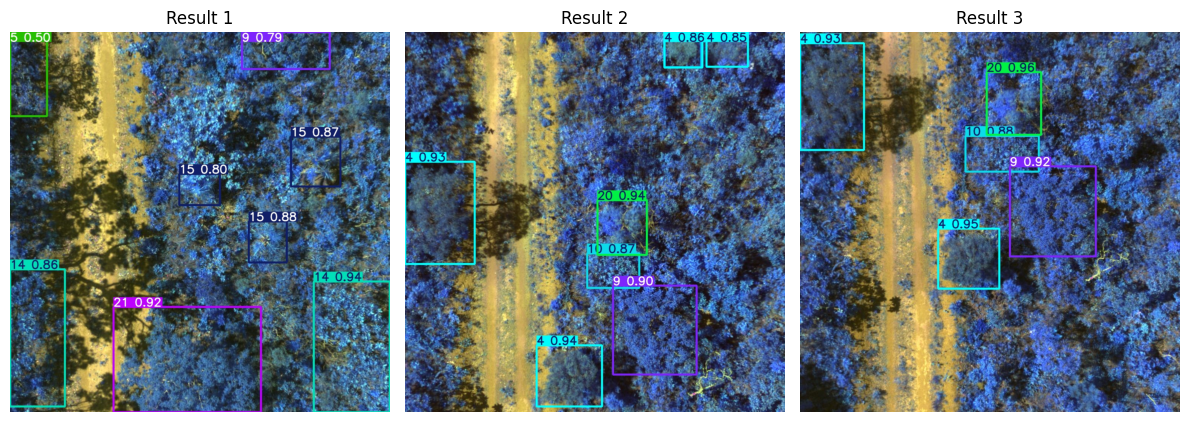

In [12]:
# Extract the list of saved image paths from the results object
saved_images = os.listdir(results[0].save_dir)  

# Randomly select images from the saved images
random_images = random.sample(saved_images, 3)

fig, axes = plt.subplots(1, 3, figsize=(12, 6))

for i, ax in enumerate(axes):
    if i < len(random_images):
        img = Image.open(f"{results[0].save_dir}/{random_images[i]}")
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"Result {i+1}")
    else:
        ax.axis('off')

plt.tight_layout()
plt.show()
